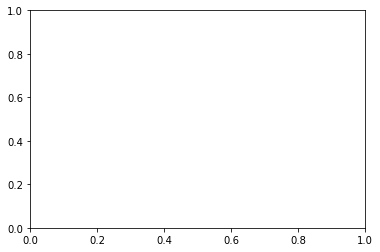

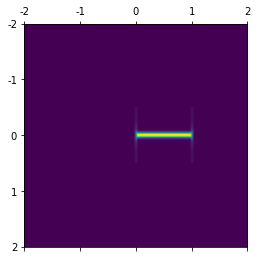

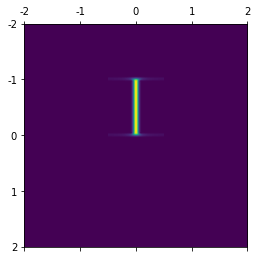

In [38]:
#Implements a spectrogram from scratch and tests it on a compactly supported sinosoid signal.

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

x=np.ones((1,256))
#y=np.fft.fft(x)
x=np.append(x,np.zeros((1,256)))
x=np.append(np.zeros((1,512)),x)

#y=np.append(y,np.zeros((1,256)))
#y=np.append(np.zeros((1,512)),y)

#y=np.exp(-np.pi*1j*np.linspace(8,-8,4096))*np.sin(np.pi*np.linspace(10,-10,4096))/(np.pi*np.linspace(10,-10,4096))
#plt.plot(abs(y))

#print(abs(y))
#plt.plot(abs(y))

win=np.exp(-np.pi*np.square(np.linspace(-10,10,256)))

#plt.specgram(x,mode='magnitude',scale='linear')

fig1=plt.subplots(1,1)


B=np.zeros((256,1024-256),dtype='complex')

for i in range(1024-256):
    b=np.fft.fft(x[i:i+256]*win)
    #d=np.fft.fft(y[i:i+256]*win)
    B[:,i]=b
    #D[:,i]=d

A=B[128:256,:]
B[128:256,:]=B[0:128,:]
B[0:128,:]=np.flip(A,0)
B=np.append(B,np.zeros((256+128,1024-256)),0)
B=np.append(np.zeros((256+128,1024-256)),B,0)
B=np.append(np.zeros((1024,128)),B,1)
B=np.append(B,np.zeros((1024,128)),1)

D=np.copy(B)

#E=D[128:256,:]
#D[128:256,:]=D[0:128,:]
#D[0:128,:]=np.flip(E,0)
#plt.clf()
#B=A[0]
#print(np.shape(B))
#C=A[1]


p=np.linspace(-4,4,1024)

D=np.transpose(D)
D=np.flip(D,0)

#print(abs(B))
plt.matshow(np.abs(B))
plt.xticks([0,256,512,512+256,1024],['-2','-1','0','1','2'])
plt.yticks([0,256,512,512+256,1024],['-2','-1','0','1','2'])

plt.matshow(np.abs(D))
plt.xticks([0,256,512,512+256,1024],['-2','-1','0','1','2'])
plt.yticks([0,256,512,512+256,1024],['-2','-1','0','1','2'])

plt.show()